In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Features of the Iris Dataset**
1.  **Survived**: Indicates whether the passenger survived (1) or not (0).
*   Type: Categorical (Binary).
*   Importance: This is the target variable in the Titanic dataset and is used to predict survival.

2. **Pclass**: Passenger class (1st, 2nd, or 3rd).
* Type: Categorical (Ordinal).
*  Importance: Passenger class is a proxy for socioeconomic status and can affect the likelihood of survival.

3. **Sex**: Gender of the passenger (male or female).
* Type: Categorical (Nominal).
*   Importance: Gender plays a crucial role in survival rates due to the "women and children first" policy.

4. **Age**: Age of the passenger in years.
*   Type: Numerical (Continuous).
*   Importance: Age can influence survival, with younger passengers often prioritized for rescue.

5. **SibSp**: Number of siblings and spouses aboard the Titanic.
*   Type: Numerical (Discrete).
*  Importance: Indicates family connections on the ship, which can affect survival.

6. **Parch**: Number of parents and children aboard the Titanic.
*   Type: Numerical (Discrete).
*   Importance: Indicates family connections and dependencies on the ship, which can influence survival chances.

7. **Fare**: The fare paid by the passenger for the voyage.
*   Type: Numerical (Continuous).
*   Importance: Higher fares are often associated with higher socioeconomic status, which can impact survival.

8. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
*   Type: Categorical (Nominal).
*   Importance: The port of embarkation might be related to the class and fare, indirectly affecting survival.

9. **Class**: Alternative representation of the passenger class (First, Second,
Third).
* Type: Categorical (Ordinal).
*   Importance: Similar to pclass, but can be used for clearer interpretation.

10. **Who**: A categorical feature derived from the sex and age (man, woman, child).
*   Type: Categorical (Nominal).
* Importance: Helps in understanding the demographic breakdown of the passengers.



6. **Parch**: Number of parents and children aboard the Titanic.
*   Type: Numerical (Discrete).
*   Importance: Indicates family connections and dependencies on the ship, which can influence survival chances.

7. **Fare**: The fare paid by the passenger for the voyage.
*   Type: Numerical (Continuous).
*   Importance: Higher fares are often associated with higher socioeconomic status, which can impact survival.

8. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
*   Type: Categorical (Nominal).
*   Importance: The port of embarkation might be related to the class and fare, indirectly affecting survival.

9. **Class**: Alternative representation of the passenger class (First, Second,
Third).
* Type: Categorical (Ordinal).
*   Importance: Similar to pclass, but can be used for clearer interpretation.

10. **Who**: A categorical feature derived from the sex and age (man, woman, child).
*   Type: Categorical (Nominal).
* Importance: Helps in understanding the demographic breakdown of the passengers.

11. **Adult_male**: Indicates if the passenger is an adult male (True or False).*   Type: Categorical (Binary).
*   Importance: Adult males were often the last to be rescued, impacting survival rates.

12. **Deck**: The deck on which the passenger's cabin was located.
*   Type: Categorical (Nominal).
*   Importance: The deck can indicate the passenger's class and proximity to lifeboats, influencing survival chances.

13. **Embark_town**: The name of the town where the passenger boarded (Cherbourg, Queenstown, Southampton).
*  Type: Categorical (Nominal).
*  Importance: Similar to embarked, but provides more descriptive information.

14. **Alive**: Indicates if the passenger survived (yes or no).
* Type: Categorical (Binary).
*   Importance: Redundant feature, as it directly corresponds to survived.

15. **Alone**: Indicates if the passenger was alone (True if SibSp and Parch are 0, False otherwise).
*   Type: Categorical (Binary).
*   Importance: Being alone can influence survival, as passengers with family might have had different rescue priorities.

In [39]:
#Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [40]:
# Load the Titanic dataset from seaborn
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# Summary statistics of numerical features
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
# Data types of all columns
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

**Cleaning the dataset**

In [43]:
# Checking for missing values
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
# Drop rows with missing 'Embarked'
data = data.dropna(subset=['embarked'])

In [45]:
# Fill missing 'Age' with the median age
data['age'] = data['age'].fillna(data['age'].median())

In [46]:
# Add 'Unknown' to the categories of 'deck' column
data['deck'] = data['deck'].cat.add_categories('Unknown')

# Now you can fill NaN with 'Unknown'
data['deck'] = data['deck'].fillna('Unknown')

In [47]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Visualization**

**Distribution of Numerical Features**


1.  Visualize the distribution of numerical features such as age and fare.



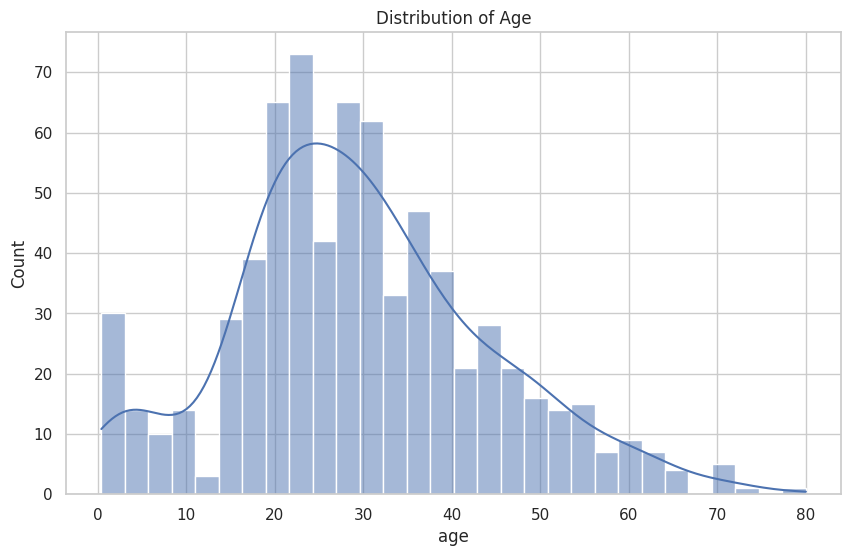

In [48]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

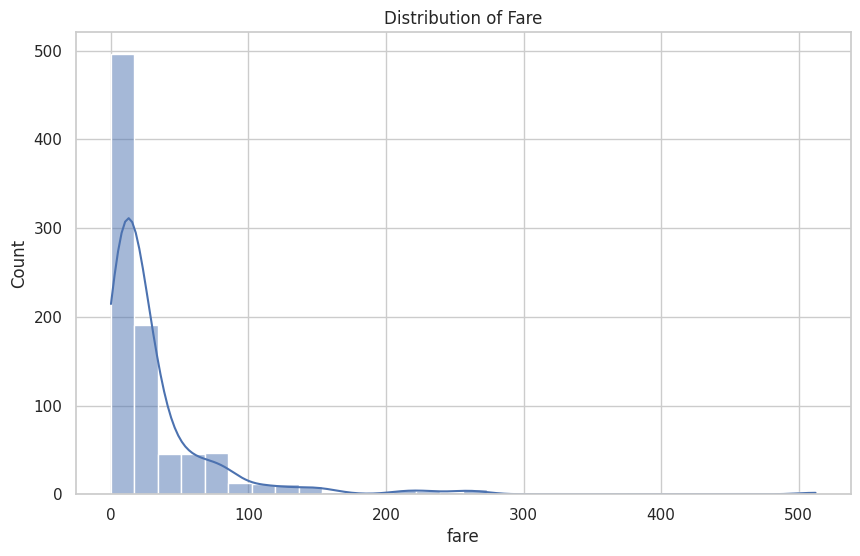

In [49]:
# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()

**Count Plots for Categorical Features**
Visualize the counts of categorical features such as survived, pclass, sex, embarked, class, who, adult_male, deck, embark_town, alive, and alone.

<ipython-input-50-411787030762>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=data, palette='Set2') # Example palette, choose your own!


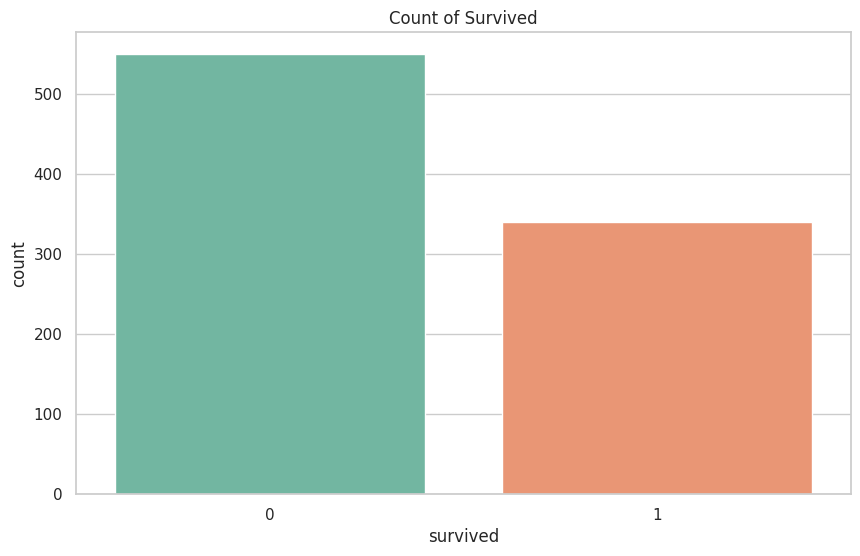

In [50]:
# Count plot for Survived with color
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=data, palette='Set2') # Example palette, choose your own!
plt.title('Count of Survived')
plt.show()

<ipython-input-51-c2ed18bf0899>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=data, palette='Set2')


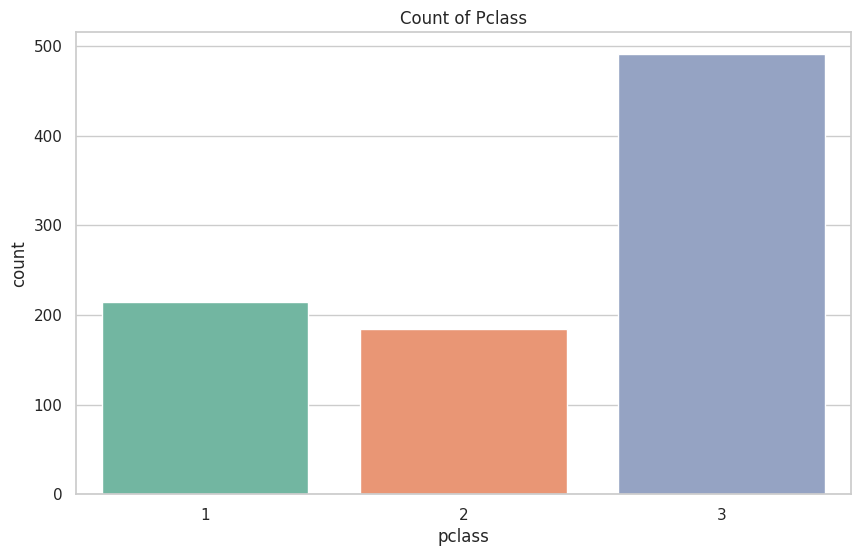

In [51]:
# Count plot for Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', data=data, palette='Set2')
plt.title('Count of Pclass')
plt.show()

<ipython-input-52-8bda268e3d8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data,  palette='Set2')


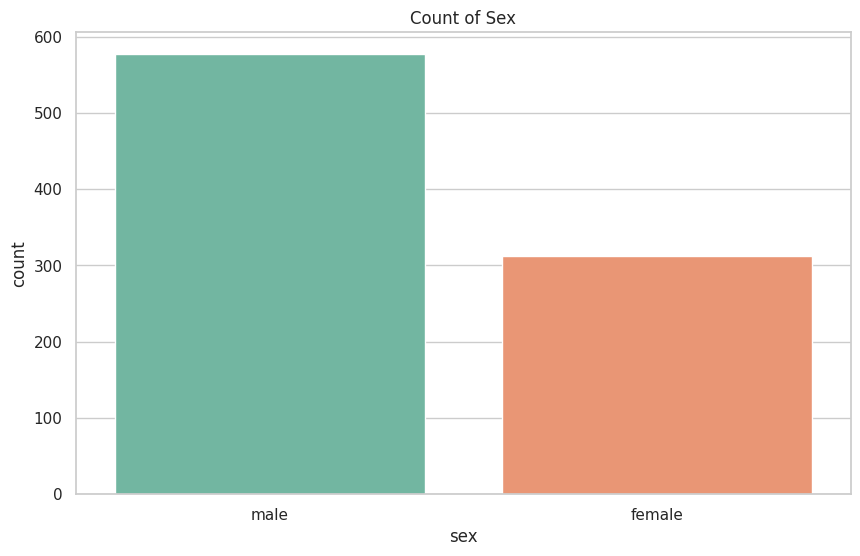

In [52]:
# Count plot for Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data,  palette='Set2')
plt.title('Count of Sex')
plt.show()

<ipython-input-53-ce8e9409cf49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=data,  palette='Set2')


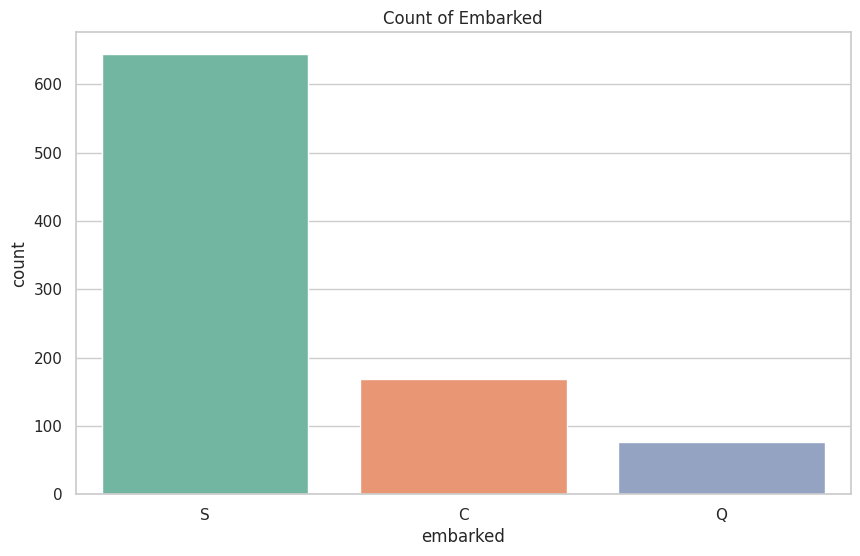

In [53]:

# Count plot for Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', data=data,  palette='Set2')
plt.title('Count of Embarked')
plt.show()

**Survival Rate by Categorical Features**
Visualize the survival rate by various categorical features.

<ipython-input-54-27f80d91e761>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=data, palette='viridis') # Example palette


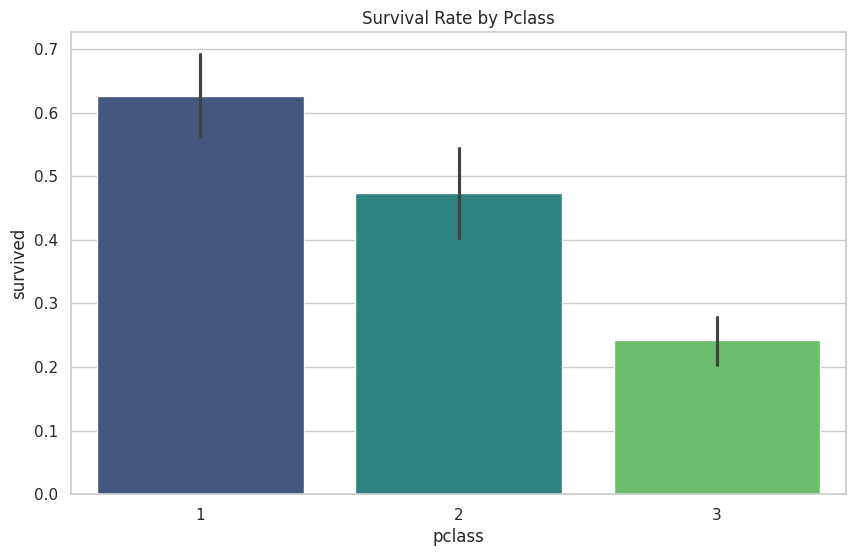

In [54]:
# Survival Rate by Pclass with color
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=data, palette='viridis') # Example palette
plt.title('Survival Rate by Pclass')
plt.show()

<ipython-input-55-480070f05dd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=data, palette='viridis')


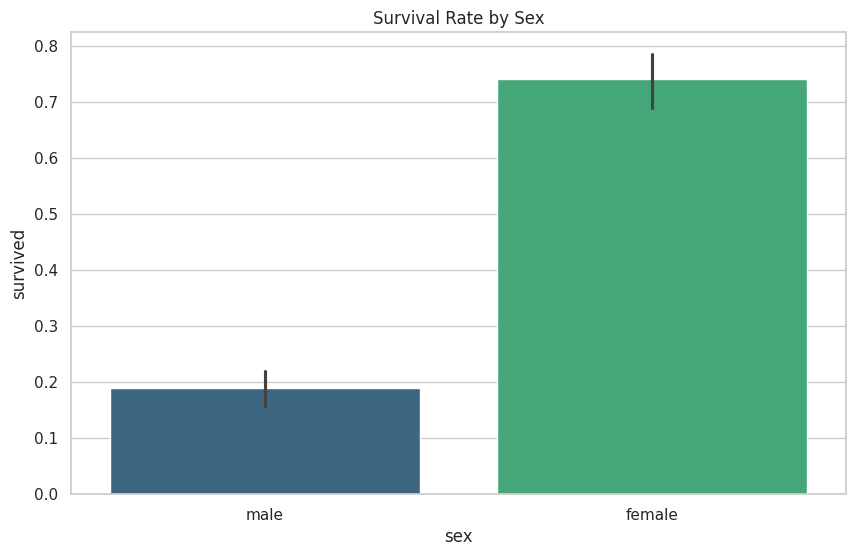

In [55]:
# Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=data, palette='viridis')
plt.title('Survival Rate by Sex')
plt.show()

<ipython-input-56-40e64650d014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survived', data=data, palette='viridis')


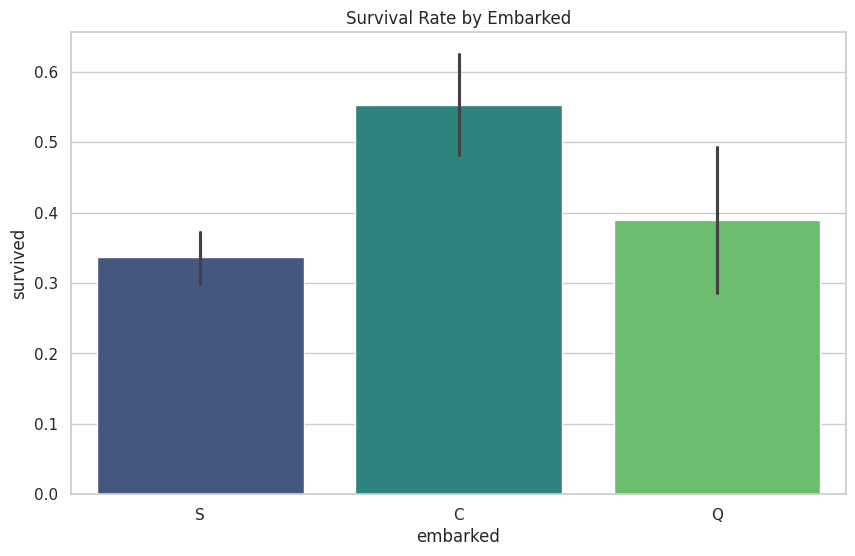

In [56]:
# Survival Rate by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='survived', data=data, palette='viridis')
plt.title('Survival Rate by Embarked')
plt.show()

**Correlation Heatmap**


*   A heatmap of the correlation matrix helps us understand how the features are correlated with each other.


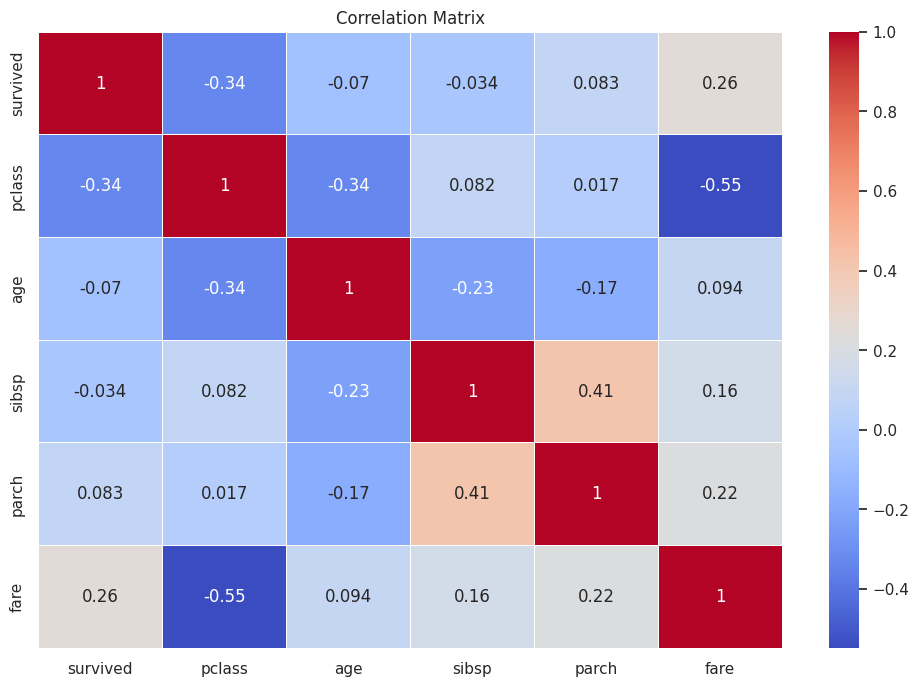

In [57]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Pairplot**


*   A pairplot will give us a good overview of the relationships between pairs of features and the distribution of individual features.



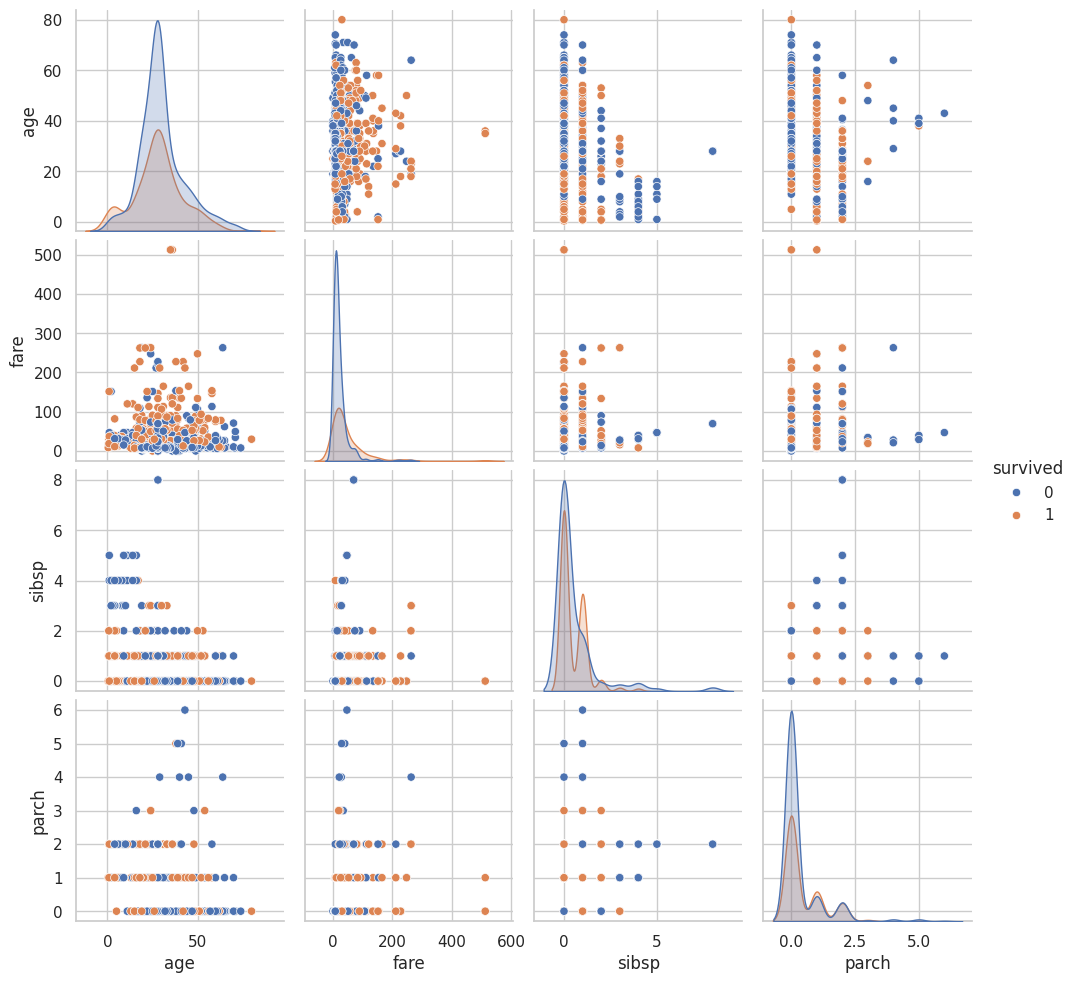

In [58]:
# Pairplot
sns.pairplot(data, hue='survived', vars=['age', 'fare', 'sibsp', 'parch'])
plt.show()


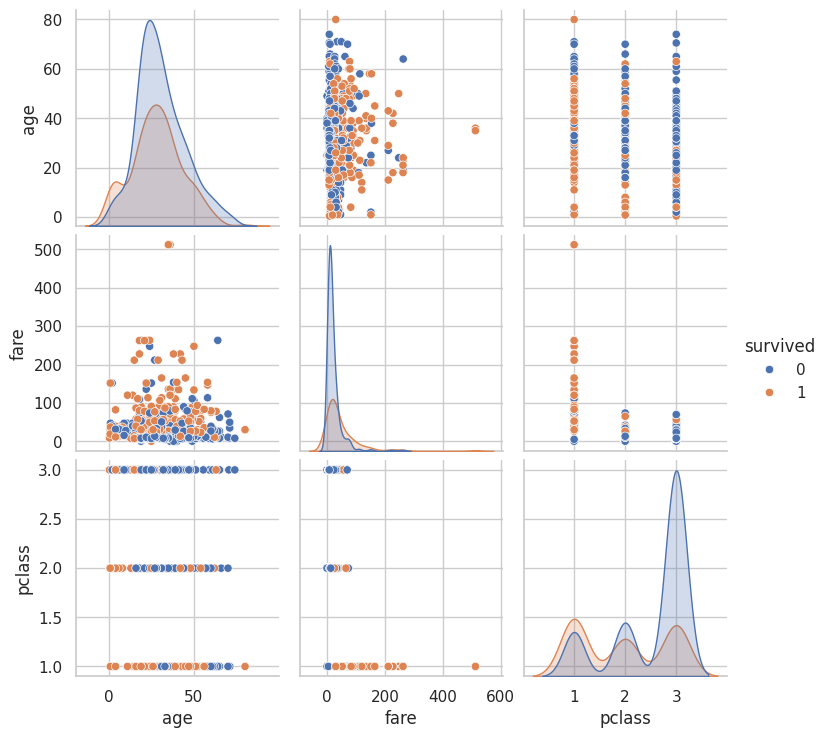

In [63]:
# Pairplot to visualize the relationships between selected numerical variables
sns.pairplot(df[['age', 'fare', 'survived', 'pclass']], hue='survived', diag_kind='kde')
plt.show()

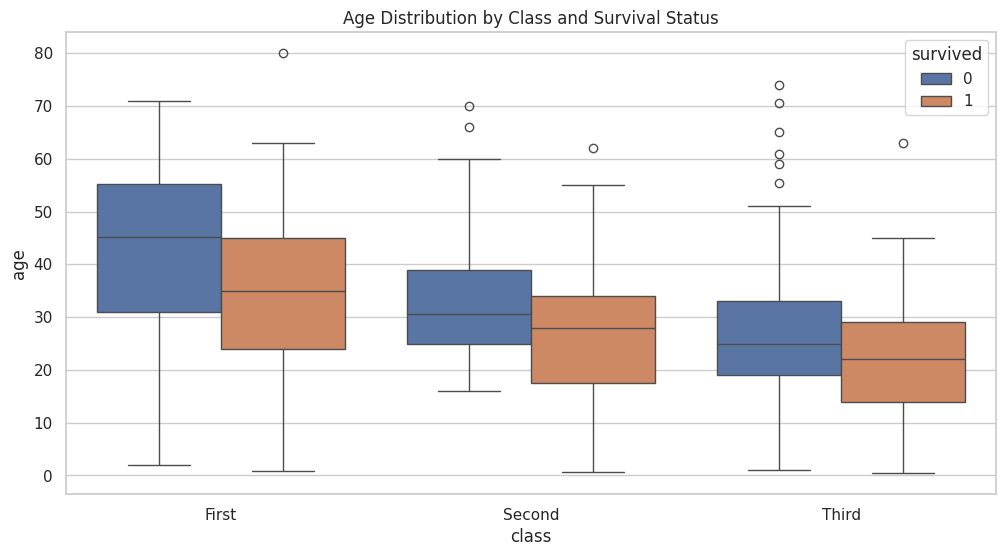

In [59]:
# Boxplot to visualize the age distribution by class and survival status
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='age', hue='survived', data=df)
plt.title('Age Distribution by Class and Survival Status')
plt.show()

**Violin Plot**


*   Violin plots will help us understand the distribution of numerical features across different categories.



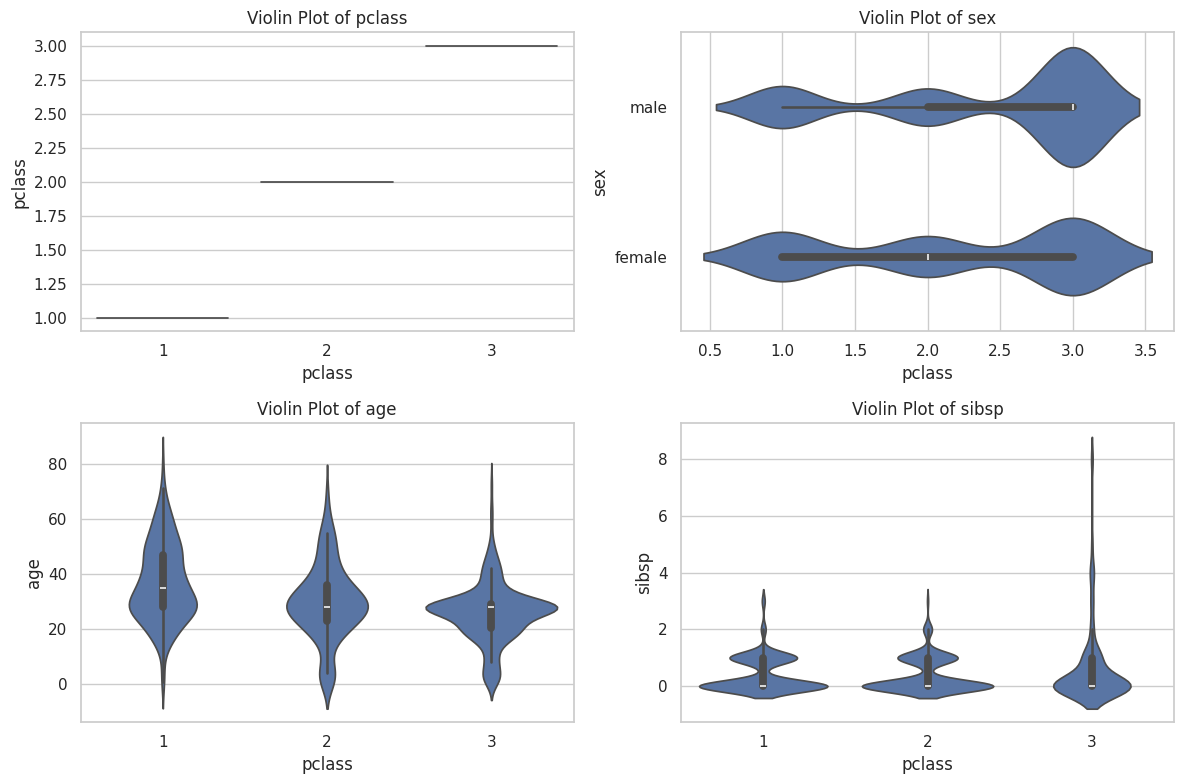

In [60]:
# Violin plot for each feature by species
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[1:-1], 1):
    if i > 4:  # Check if we've exceeded the 2x2 grid
        break  # Stop the loop if we have
    plt.subplot(2, 2, i)
    sns.violinplot(x='pclass', y=column, data=data)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

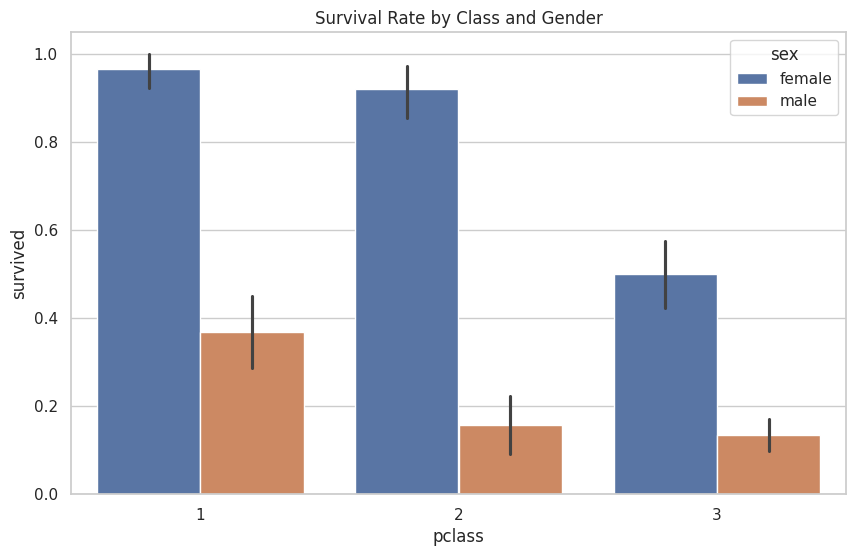

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=data)
plt.title('Survival Rate by Class and Gender')
plt.show()


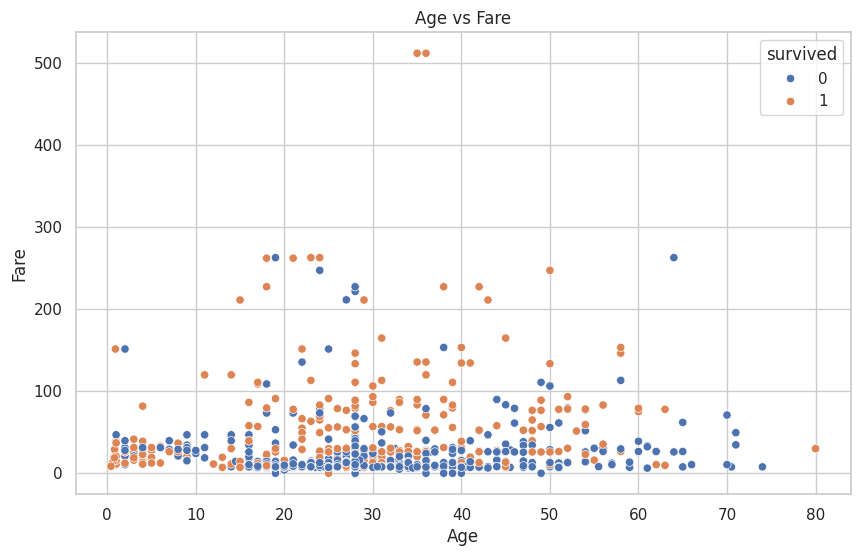

In [62]:
# Scatterplot to visualize the relationship between age and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=data)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()